https://arxiv.org/pdf/1711.06125

https://jayspeidell.github.io/portfolio/project07-galazy-zoo/

https://arxiv.org/pdf/1711.06125

https://towardsdatascience.com/galaxy-zoo-classification-with-keras-219184aff581/

https://www.kaggle.com/competitions/galaxy-zoo-the-galaxy-challenge/overview

[alendar.google.com/calendar/u/0/r?tab=wc&pli=1](https://github.com/soliao/Galaxy-Zoo-Classification/blob/main/gz2_Resnet50_Pytorch.ipynb)


https://data.galaxyzoo.org/

https://jayspeidell.github.io/portfolio/project07-galazy-zoo/


Hacer que las cosas sean más rápidas

In [85]:
import os
import sys
import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

En primer lugar usamos un modelo sencillo de Arbol de Decision para claasificar nuestras galaxias basadas en sus careacteristicas fisicas.

En general hay tres tipos de galaxias:
- Elípticas
- Espirales
- Irregulares

Las caracteristicias físicas que usamos para entrenar el modelo para realizar la clasificación son:

- `class`: Tipo de galaxia (0: Elíptica, 1: Espiral, 2: Irregular)
- `Indice de color`: Cantidad de luz emitida en diferentes longitudes de onda, que indica la edad y composición de las estrellas en la galaxia.
    - `u-g`: Índice de color entre las bandas ultravioleta (u) y verde (g). Indicador de la presencia de estrellas jóvenes y calientes. Un valor bajo sugiere una galaxia con formación estelar activa. Entre más alto sea el valor, más vieja es la población estelar.
    - `g-r`: Índice de color entre las bandas verde (g) y roja (r).  Indicador de la edad estelar. Un valor bajo indica una galaxia con estrellas más jóvenes, mientras que un valor alto sugiere una población estelar más vieja. Además puede indicar la presencia de polvo interestelar.
    - `r-i`: Índice de color entre las bandas roja (r) e infrarroja (i). Un valor sensible con la metalicidad de las estrellas en la galaxia. Un valor bajo indica una galaxia con estrellas más jóvenes y menos metálicas, mientras que un valor alto sugiere una población estelar más vieja y rica en metales.
    - `i-z`: Índice de color entre las bandas infrarroja (i) y z. Un valor sensible a la presencia de estrellas viejas y la cantidad de polvo en la galaxia. Un valor bajo indica una galaxia con menos polvo y una población estelar más joven, mientras que un valor alto sugiere una galaxia con más polvo y estrellas más viejas. Se relaciona fuertemente con la masa estelar de la galaxia
- `ecc`: Excentricidad de la galaxia, que indica qué tan alargada está en comparación con una forma circular perfecta. Valores cercanos a 0 indican una forma más circular, mientras que valores cercanos a 1 indican una forma más alargada.
- `m4_u`: Cuarto momento de la luz en la banda ultravioleta (u). Este valor mide la forma de la distribución de luz en la galaxia. Valores positivos indican una distribución más apuntada, mientras que valores negativos indican una distribución más achatada.
- `m4_g`: Cuarto momento de la luz en la banda verde (g). Este valor mide la forma de la distribución de luz en la galaxia. Valores positivos indican una distribución más apuntada, mientras que valores negativos indican una distribución más achatada.
- `m4_r`: Cuarto momento de la luz en la banda roja (r). Este valor mide la forma de la distribución de luz en la galaxia. Valores positivos indican una distribución más apuntada, mientras que valores negativos indican una distribución más achatada.
- `m4_i`: Cuarto momento de la luz en la banda infrarroja (i). Este valor mide la forma de la distribución de luz en la galaxia. Valores positivos indican una distribución más apuntada, mientras que valores negativos indican una distribución más achatada.
- `m4_z`: Cuarto momento de la luz en la banda z. Este valor mide la forma de la distribución de luz en la galaxia. Valores positivos indican una distribución más apuntada, mientras que valores negativos indican una distribución más achatada.
- `petroR90_u/petroR50_u`: Razón entre los radios de Petrosian que contienen el 90% y el 50% de la luz total en la banda u. Esta razón es un indicador de la concentración de la luz en la galaxia. Valores más altos indican una mayor concentración de luz hacia el centro de la galaxia, lo que es característico de galaxias elípticas. Valores más bajos indican una distribución de luz más uniforme, típica de galaxias espirales.
- `petroR90_r/petroR50_r`: Razón entre los radios de Petrosian que contienen el 90% y el 50% de la luz total en la banda r. Esta razón es un indicador de la concentración de la luz en la galaxia. Valores más altos indican una mayor concentración de luz hacia el centro de la galaxia, lo que es característico de galaxias elípticas. Valores más bajos indican una distribución de luz más uniforme, típica de galaxias espirales.
- `petroR90_z/petroR50_z`: Razón entre los radios de Petrosian que contienen el 90% y el 50% de la luz total en la banda z. Esta razón es un indicador de la concentración de la luz en la galaxia. Valores más altos indican una mayor concentración de luz hacia el centro de la galaxia, lo que es característico de galaxias elípticas. Valores más bajos indican una distribución de luz más uniforme, típica de galaxias espirales.

<center>
<img src="https://speclite.readthedocs.io/en/latest/_images/sdss2010.png" alt="Galaxy Types" width="600"/>
</center>

Los datos y la base de esta sección fueron tomados de [jayashree2699/Galaxy-Classification](https://github.com/jayashree2699/Galaxy-Classification)

In [ ]:
# Cargar los datos
data = np.load('data/DecisionTree_GalaxyCatalogue.npy')

# Crear un DataFrame con las características seleccionadas
nombre_columnas = [
    'class',
    'u-g', 'g-r', 'r-i', 'i-z',
    'ecc', 
    'm4_u', 'm4_g', 'm4_r', 'm4_i', 'm4_z',
    'petroR50_R90_u', 'petroR50_R90_r', 'petroR50_R90_z',
]
datos = pd.DataFrame({
    'class': data['class'],
    'u-g': data['u-g'],
    'g-r': data['g-r'],
    'r-i': data['r-i'],
    'i-z': data['i-z'],
    'ecc': data['ecc'],
    'm4_u': data['m4_u'],
    'm4_g': data['m4_g'],
    'm4_r': data['m4_r'],
    'm4_i': data['m4_i'],
    'm4_z': data['m4_z'],
    'petroR50R90_u': data['petroR50_u'] / data['petroR90_u'],
    'petroR50R90_r': data['petroR50_r'] / data['petroR90_r'],
    'petroR50R90_z': data['petroR50_z'] / data['petroR90_z'],
})

pprint.pprint(datos.head())

    class      u-g      g-r      r-i      i-z       ecc      m4_u      m4_g  \
0  merger  1.85765  0.67158  0.42310  0.30610  0.585428  2.251946  2.339849   
1  merger  1.74259  0.86085  0.44927  0.28851  0.749812  2.031566  2.084156   
2  merger  2.10697  0.96710  0.56810  0.33747  0.630089  1.992887  2.450746   
3  merger  1.22840  0.60446  0.39049  0.28913  0.668999  2.056115  2.182252   
4  merger  1.80792  0.78124  0.45528  0.35067  0.500170  2.259167  2.194723   

       m4_r      m4_i      m4_z  petroR50_R90_u  petroR50_R90_r  \
0  2.380652  2.359738  2.395528        0.598113        0.462170   
1  2.092272  2.124075  2.133154        0.383216        0.416320   
2  2.473116  2.465324  2.438683        0.340249        0.433751   
3  2.309510  2.391414  2.472397        0.378602        0.333005   
4  2.264567  2.334713  2.352568        0.353735        0.322113   

   petroR50_R90_z  
0        0.333373  
1        0.416091  
2        0.307428  
3        0.314361  
4        0.339692  


Ahora gráficamos las características físicas de las galaxias para observar cómo se distribuyen entre los diferentes tipos de galaxias. Para esto nos valemos de la biblioteca `seaborn` para crear gráficos de dispersión y diagramas de caja.

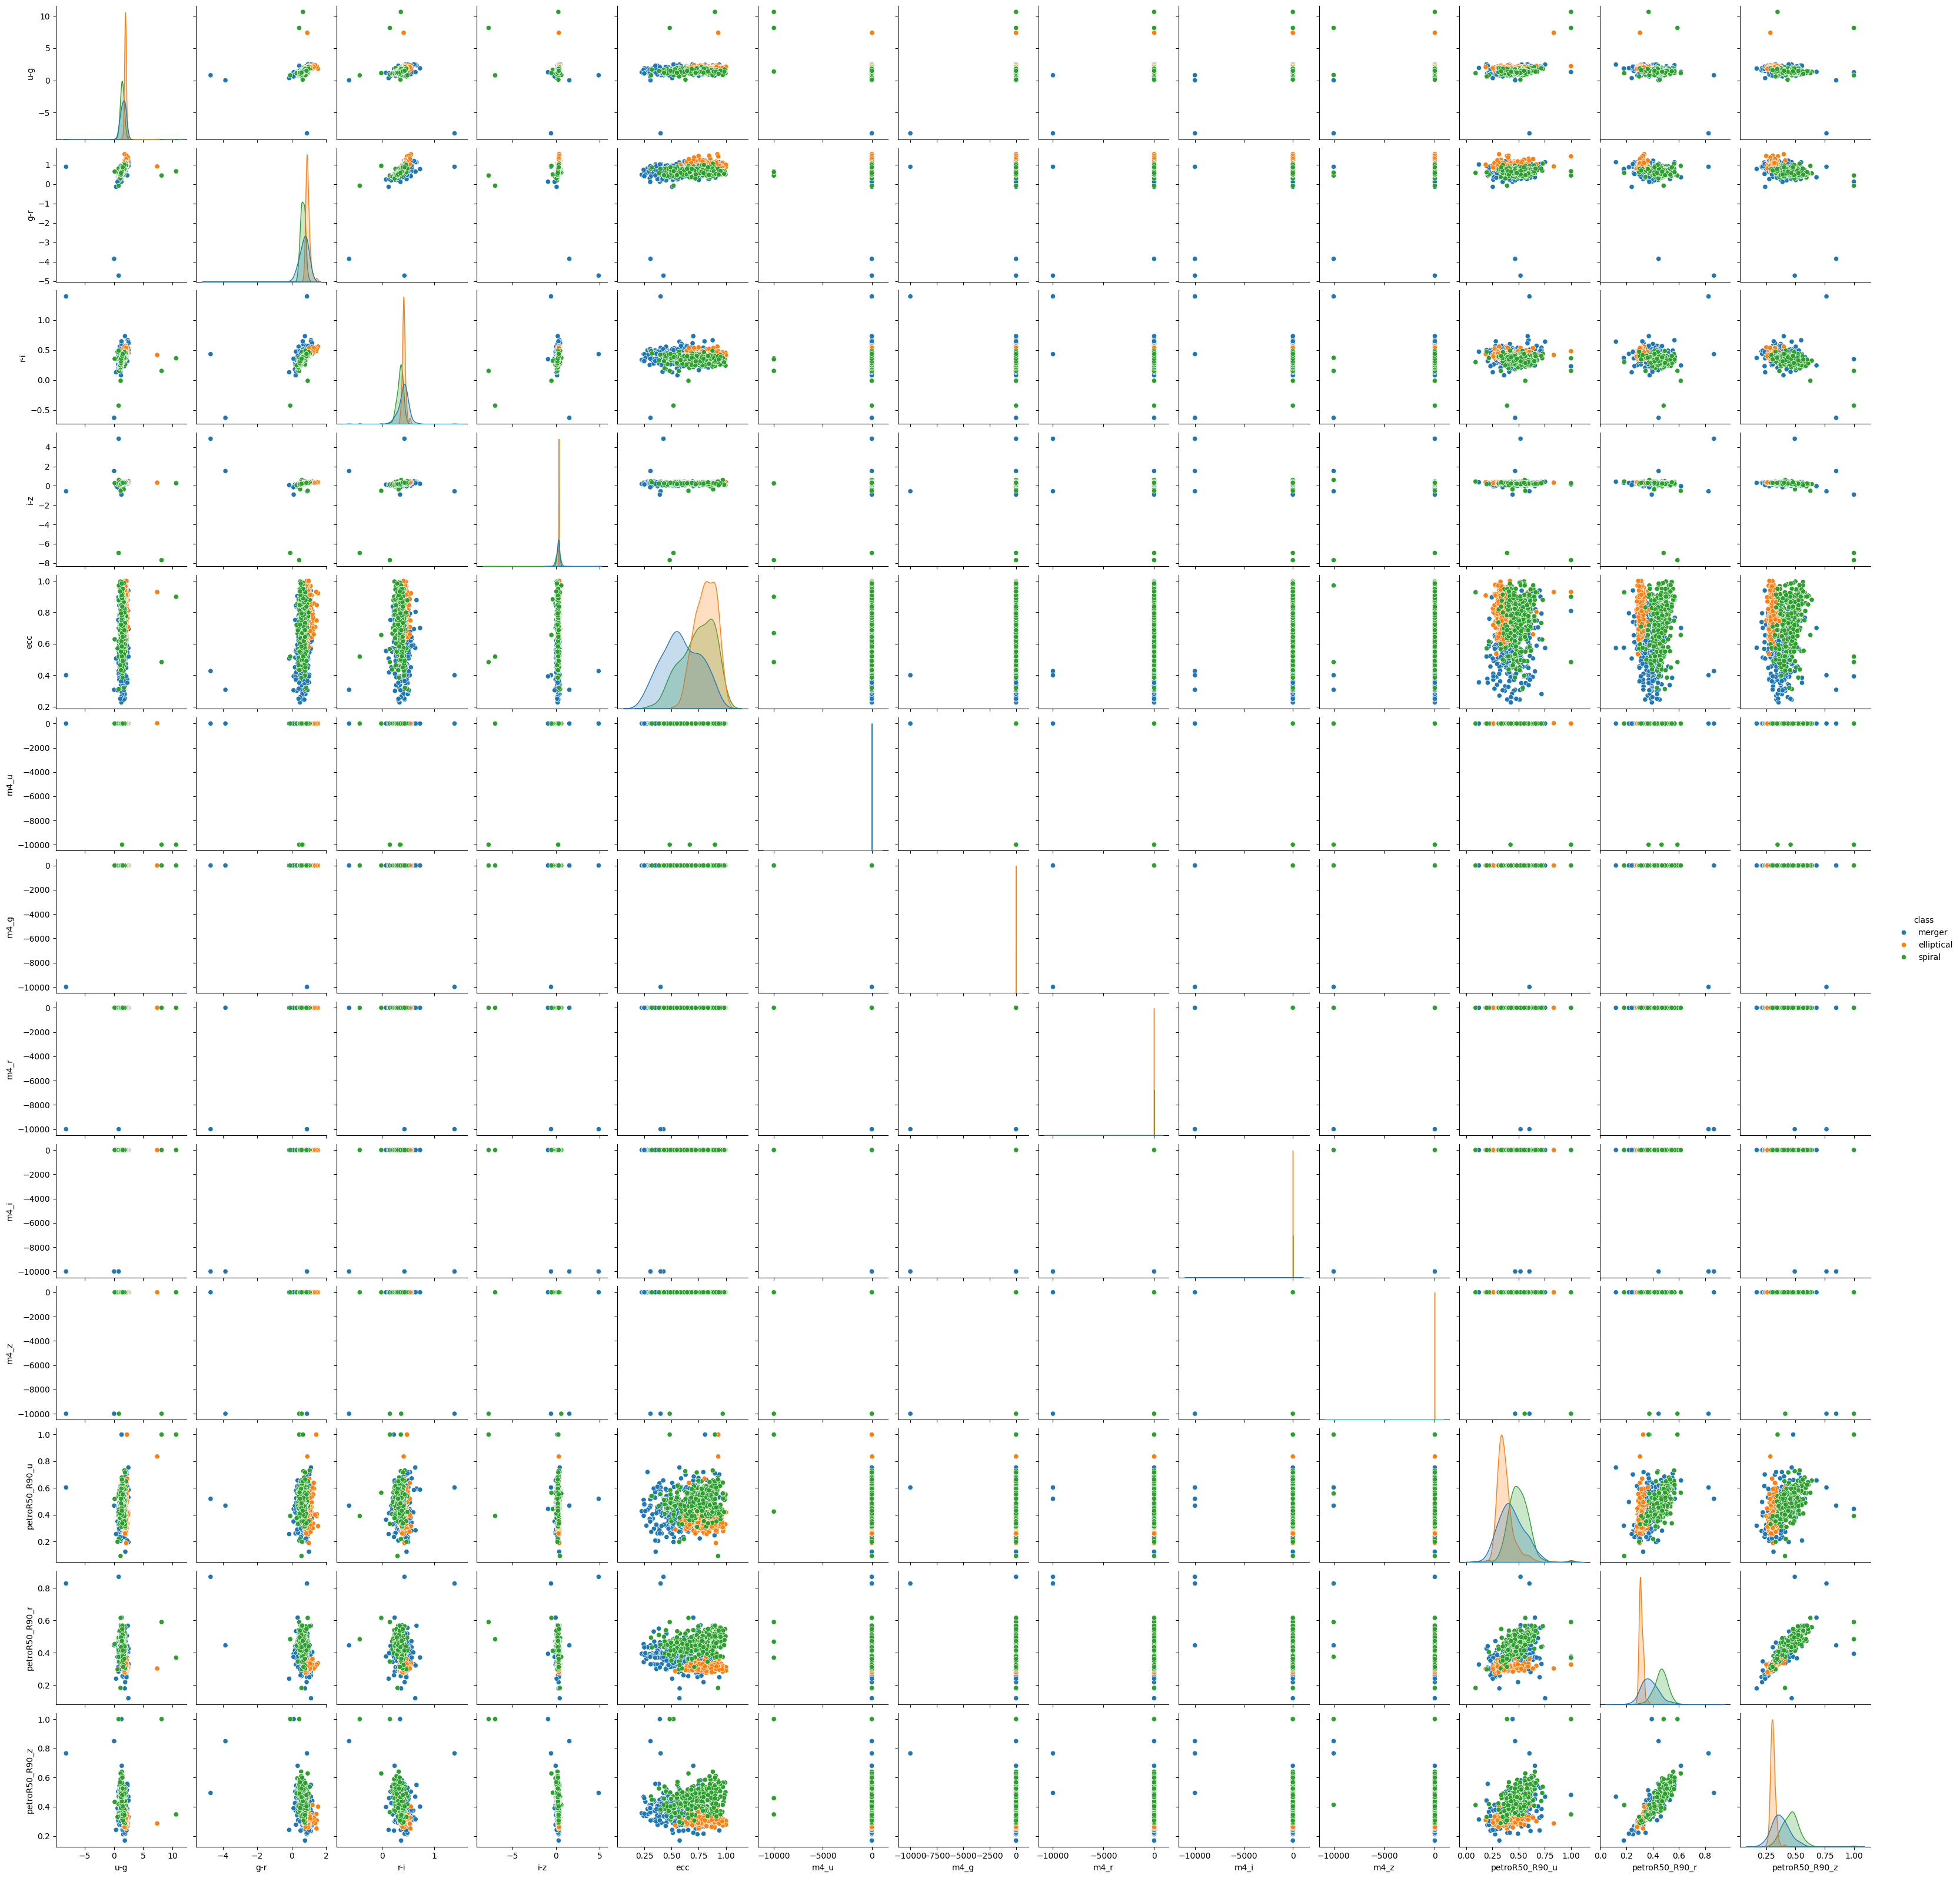

In [92]:
sns.pairplot(datos, hue='class', vars=nombre_columnas[1:])
plt.show()

Vemos que hay caracteristicas que no nos aportan informacion para la clasificacion de las galaxias, por lo que las eliminamos de nuestro conjunto de datos. Nos quedamos, entonces, co las caracteristicas que nos permiten una mejor clasificacion. No solo basandonos en la distribución de los datos, sino también el conocimiento astronómico previo sobre las galaxias que tenemos como conocimiento experto.

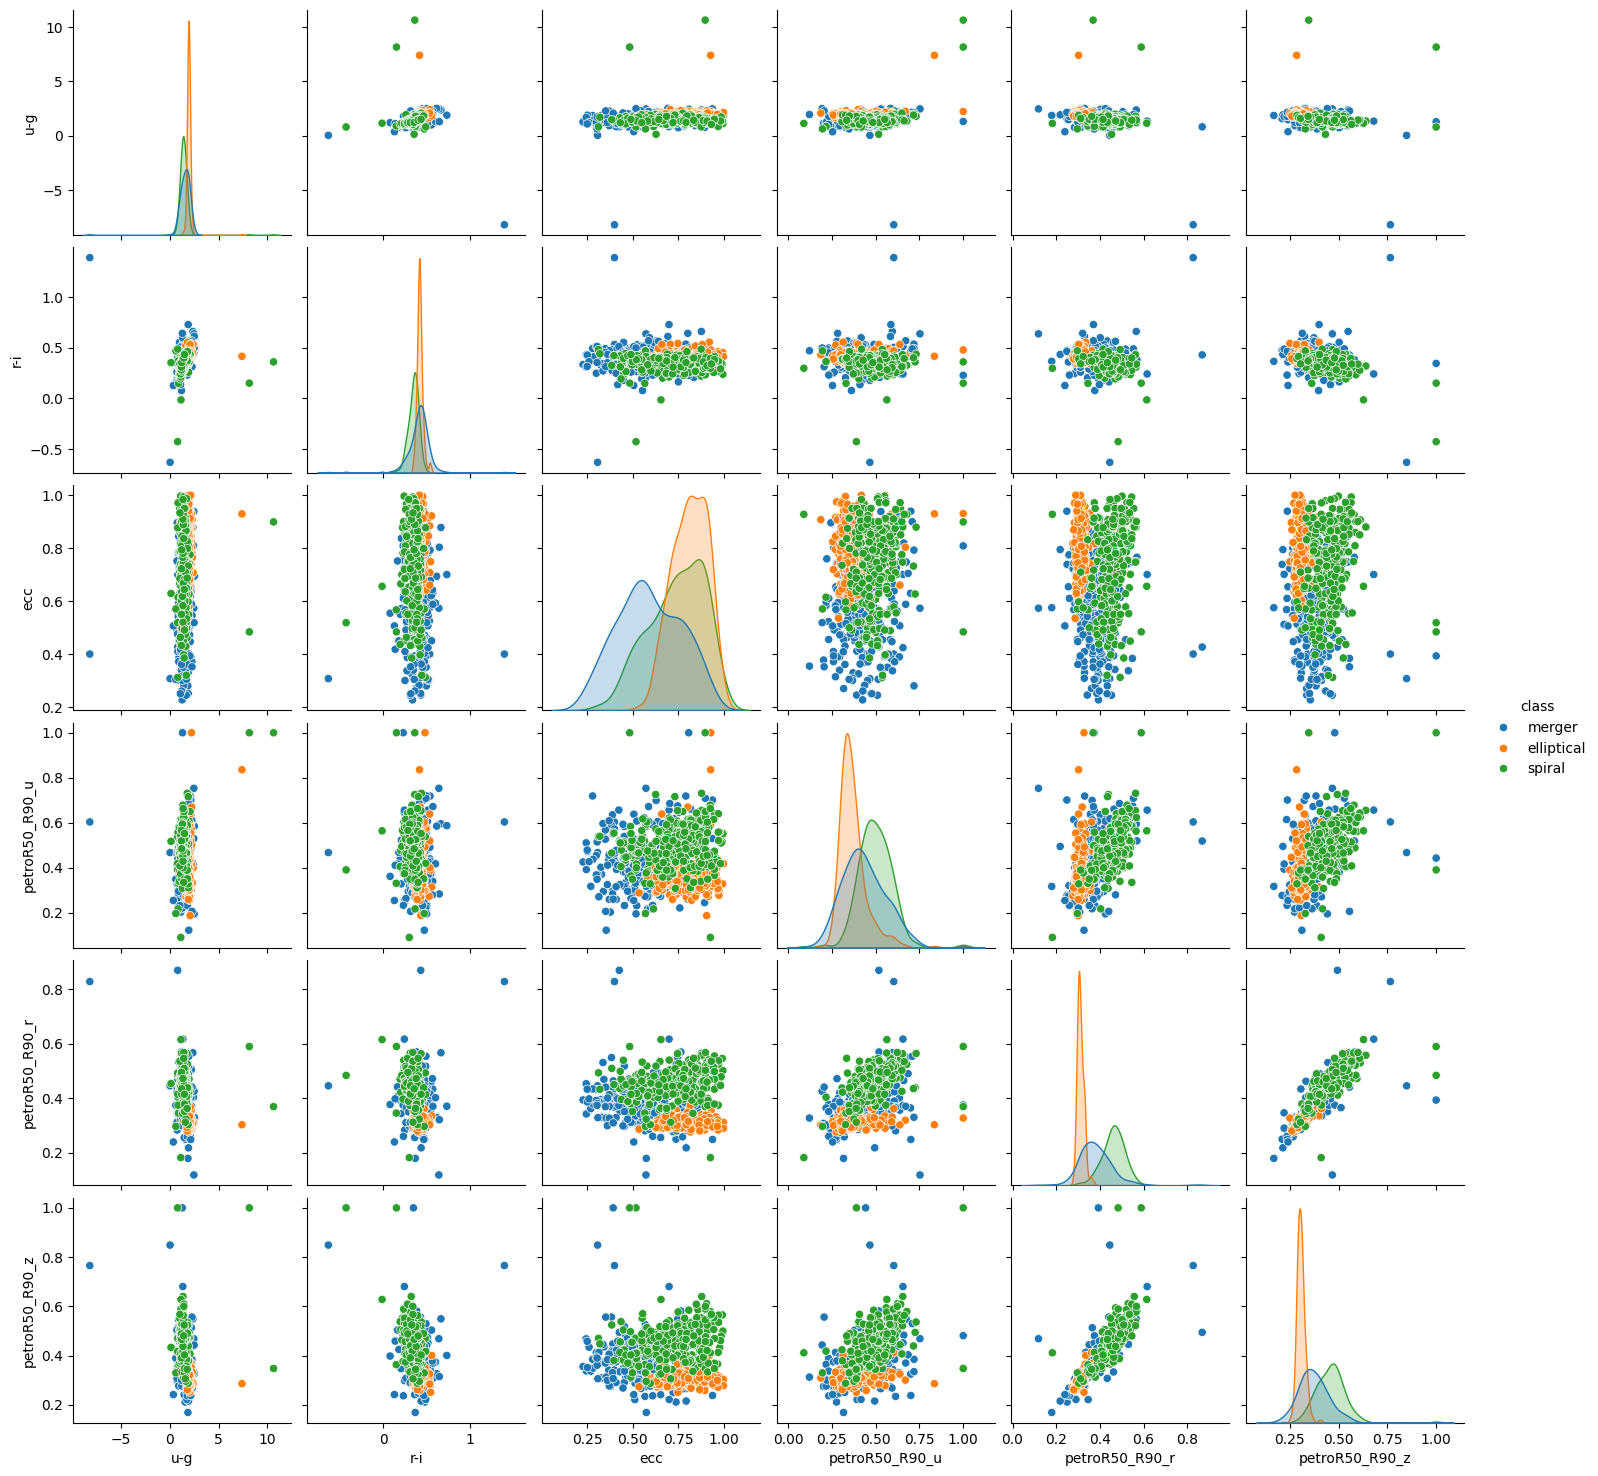

In [93]:
datos = datos.drop(columns=['g-r','i-z','m4_u', 'm4_g', 'm4_r', 'm4_i', 'm4_z'])
sns.pairplot(datos, hue='class', vars=datos.columns[1:])
plt.show()

In [100]:
clases = datos['class']

# Dividir los datos en conjuntos de entrenamiento y prueba, donde 
# el 20% de los datos se usan para prueba y el 80% para entrenamiento.
# Usamos stratify para mantener la proporción de clases en ambos conjuntos

train, test = train_test_split(datos, test_size=0.2, random_state=42, stratify=clases)
train_clases, test_clases = train.pop('class'), test.pop('class')

print(f'Tamaño del conjunto de entrenamiento: {train.shape[0]}')
print(f'Tamaño del conjunto de prueba: {test.shape[0]}')
print()
print(f'Ejemplo de datos de entrenamiento:\n{train.head()}')

Tamaño del conjunto de entrenamiento: 624
Tamaño del conjunto de prueba: 156

Ejemplo de datos de entrenamiento:
         u-g      r-i       ecc  petroR50_R90_u  petroR50_R90_r  \
668  1.74477  0.40563  0.639541        0.422175        0.402699   
712  1.59309  0.42338  0.473485        0.450041        0.387872   
187  1.67030  0.31063  0.244414        0.510497        0.453105   
12   1.18828  0.07820  0.554200        0.361628        0.376791   
89   2.04892  0.50527  0.638022        0.605295        0.441398   

     petroR50_R90_z  
668        0.393655  
712        0.369856  
187        0.467842  
12         0.397961  
89         0.474064  


Hay muchos métodos de machine learning que podemos usar para clasificar nuestras galaxias. En este caso usamos un Árbol de Decisión por su simplicidad y facilidad de interpretación.

Los usamos contantemente en nuestras vidas diarías.
<center>
<img src="https://scontent-scl3-1.xx.fbcdn.net/v/t1.6435-9/92496570_2750568111737271_2521670067934986240_n.jpg?_nc_cat=111&ccb=1-7&_nc_sid=833d8c&_nc_eui2=AeEGuCExrOZX71v9KZV5g2I1GxJCTcY4MNUbEkJNxjgw1YcnOclkvXL-zqxf_0SkYzI&_nc_ohc=tkbjalaW_jcQ7kNvwFvDbwB&_nc_oc=Adm37CguydZrobD92K1itlY1T8c996c24fbrSAn82SDWivjJEVam_Lv9KL1EZfbdc1Q&_nc_zt=23&_nc_ht=scontent-scl3-1.xx&_nc_gid=d_yfEfJpWR7fYeROtaXHaQ&oh=00_AfhZAbTKLd5dWcQXuHUIOzfWPE9hYmpNxCGZZzt1MlCa4g&oe=693B04B4", alt="Decision Tree" width="600"/>
</center>

Pero puede llegar tan profundo como queramos, a costo de interpretabilidad y riesgo de sobreajuste..

In [120]:
arbol = DecisionTreeClassifier(max_depth=5)#, random_state=42)
arbol.fit(train, train_clases)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Ahora graficamos el árbol de decisión para entender cómo toma las decisiones el modelo al clasificar las galaxias. Utilizamos la función `plot_tree` de `sklearn.tree` para visualizar la estructura del árbol.

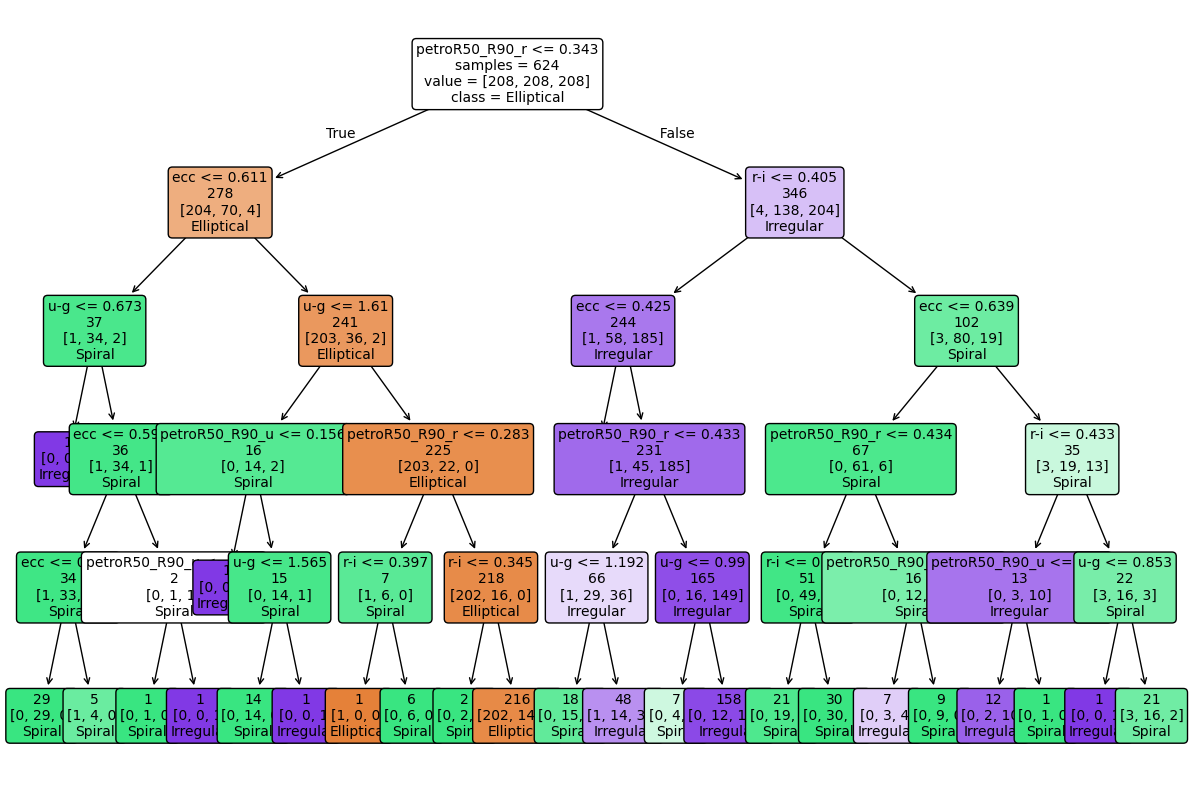

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(
    arbol, 
    feature_names=train.columns, 
    class_names=['Elliptical', 'Spiral', 'Irregular'],
    filled=True,
    label='root',
    rounded=True,
    fontsize=10,
    impurity=False, # No mostrar la impureza (gini) en los nodos
    ax = ax,
)


#plt.savefig('decision_tree.pdf')
plt.show()

Tomemos un dato aleatorio del conjunto de prueba y veamos cómo el árbol de decisión clasifica esa galaxia en particular. Seguimos el camino desde la raíz hasta una hoja, observando las decisiones tomadas en cada nodo.

In [141]:
prueba_galaxia = test.sample(n=1)#, random_state=42)
print(f'Dato de prueba seleccionado:\n{prueba_galaxia}')

Dato de prueba seleccionado:
         u-g      r-i       ecc  petroR50_R90_u  petroR50_R90_r  \
111  1.03851  0.24969  0.567327        0.458531        0.452441   

     petroR50_R90_z  
111        0.413353  


Veamos que tan bueno fue nuestra predición a mano comparandola con el resultado del modelo.

In [143]:
%%time
arbol_decision = arbol.predict(prueba_galaxia)
print(f'La galaxia fue clasificada como: {arbol_decision[0]}')

La galaxia fue clasificada como: spiral
CPU times: user 2.03 ms, sys: 1.96 ms, total: 3.98 ms
Wall time: 4.43 ms


Hay una clara diferencia de tiempos entre hacer la clasificación manualmente y usar el modelo entrenado. Mientras que la clasificación manual puede tomar varios minutos, el modelo puede clasificar una galaxia en milisegundos. Esto demuestra la eficiencia de los modelos de machine learning para tareas repetitivas y de gran volumen como la clasificación de galaxias en grandes conjuntos de datos astronómicos.

Ahora usaremos todos los datos de prueba para evaluar el rendimiento del modelo. Calculamos la precisión del modelo comparando las predicciones con las etiquetas reales de las galaxias en el conjunto de prueba.

In [132]:
predicciones = arbol.predict(test)
print(f'Cantidad de predicciones realizadas: {len(predicciones)}\n')
print(f'Predicciones del modelo para el conjunto de prueba:\n{predicciones[:5]}')

Cantidad de predicciones realizadas: 156

Predicciones del modelo para el conjunto de prueba:
['spiral' 'elliptical' 'merger' 'merger' 'elliptical']


Una forma común de evaluar el rendimiento de un modelo de clasificación es mediante una matriz de confusión. Esta matriz muestra el número de predicciones correctas e incorrectas para cada clase, lo que nos permite ver dónde el modelo está funcionando bien y dónde podría estar cometiendo errores.

Text(0, 0.5, 'Galxias reales')

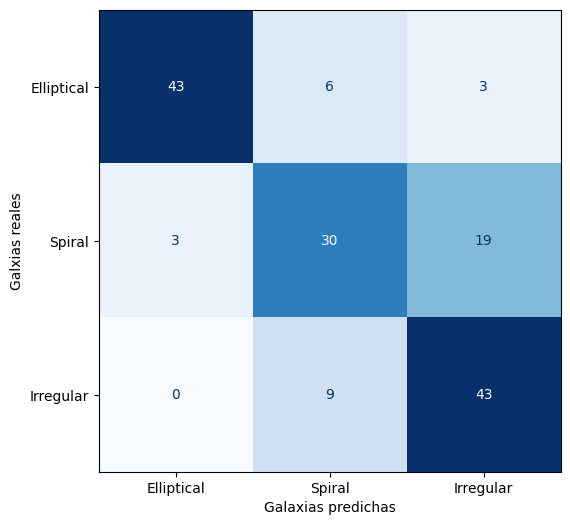

In [145]:
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay(
    confusion_matrix(test_clases, predicciones),
    display_labels=['Elliptical', 'Spiral', 'Irregular']
).plot(
    cmap=plt.cm.Blues,
    colorbar=False,
    ax=ax
)
ax.set_xlabel('Galaxias predichas')
ax.set_ylabel('Galxias reales')

El modelo no logra distinguir bien las galaxias irregulares, probablemente por la poca cantidad de datos de entrenamiento de este tipo de galaxias. Tomando diferentes estrategias de muestreo y aumentando la cantidad de datos de entrenamiento podríamos mejorar este aspecto del modelo.

Podemos calcular otra métricas para saber que tan bueno es nuestro modelo de clasificación, para esto usamos la precisión. La precisión nos indica la proporción de predicciones correctas realizadas por el modelo en comparación con el total de predicciones.

A partir de la matriz de confusión, podemos calcular la precisión del modelo utilizando la fórmula:
$$\text{Precisión} = \frac{TP}{TP + TN}$$
donde:
- $TP$ (True Positives) es el número de predicciones correctas para cada clase (la suma de los valores en la diagonal de la matriz de confusión).
- $TN$ (True Negatives) es el número de predicciones incorrectas (la suma de los valores fuera de la diagonal de la matriz de confusión).

| Elipticas | Spiral | Irregulares | Total |
|-----------|--------|-------------|-------|
| 43        | 6      | 3           | 52    |
| 3         | 30     | 19          | 52    |
| 0         | 9      | 43          | 52    |

- Los elementos de la diagonal (TP) son: $43 + 30 + 43 = 116$
- Los elementos fuera de la diagonal (TN) son: $6 + 3 + 3 + 19 + 9 = 40$

Calculamos la precisión del modelo:
$$\text{Precisión} = \frac{116}{116 + 40} \approx 0.743$$
Por lo tanto, la precisión del modelo es aproximadamente 74.3%. Esto significa que el modelo clasifica correctamente alrededor del 74.3% de las galaxias en el conjunto de prueba.

In [155]:
precision = accuracy_score(test_clases, predicciones)
print(f'Precision del modelo: {100 * precision:.1f}%')

Precision del modelo: 74.4%


La pregunta es este punto, ¿es un buen modelo de clasificación de galaxias? ¿Qué podríamos hacer para mejorarlo?

Existen otras aproximaciones más avanzadas para la clasificación de galaxias, como el uso de redes neuronales convolucionales (CNNs) que pueden aprender características directamente de las imágenes de las galaxias en lugar de depender únicamente de características físicas predefinidas. Además, aumentar la cantidad y diversidad de datos de entrenamiento, así como aplicar técnicas de aumento de datos, podría mejorar significativamente el rendimiento del modelo.

De manera que ahora vamos a explorar modelos más complejos y técnicas avanzadas para mejorar la clasificación de galaxias. Entraremos en modelos de deep learning usando imágenes de galaxias directamente como datos de entrada.

# Deeplearning

Desde la plataforma de Kaggle y la competencia [Galaxy Zoo: The Galaxy Challenge](https://www.kaggle.com/competitions/galaxy-zoo-the-galaxy-challenge/overview), descargamos el conjunto de datos de imágenes de galaxias y sus etiquetas correspondientes. 

Para desarrollar el modelo de *Deep Learning*, utilizamos [`PyTorch`](https://pytorch.org/), una de las dos bibliotecas más populares para desarollar los modelos de aprendizaje profundo.

In [215]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

# Librerías de visión por computadora
# útil para cargar y transformar imágenes
import torchvision
from torchvision import transforms

# Para una barra de progreso agradable
import tqdm

In [216]:
imagenes = [img for img in os.listdir('data/GalaxyZoo/train_images/') if img.endswith('.jpg')]
print(f'Número total de imágenes: {len(imagenes)}')

Número total de imágenes: 61578


Como vemos la cantidad de datos incremento significativamente al usar las imágenes directamente para entrenar el modelo. Ahora tenemos $61.578$ imágenes de galaxias para clasificar en lugar de solo $1.620$ datos con características físicas. Esto es un incremente importante, ya que los modelos de deep learning suelen requerir grandes cantidades de datos para entrenar de manera efectiva y evitar el sobreajuste. 

Comencemos por mostrar algunas imágenes de galaxias del conjunto de datos para familiarizarnos con el tipo de datos con los que estamos trabajando.

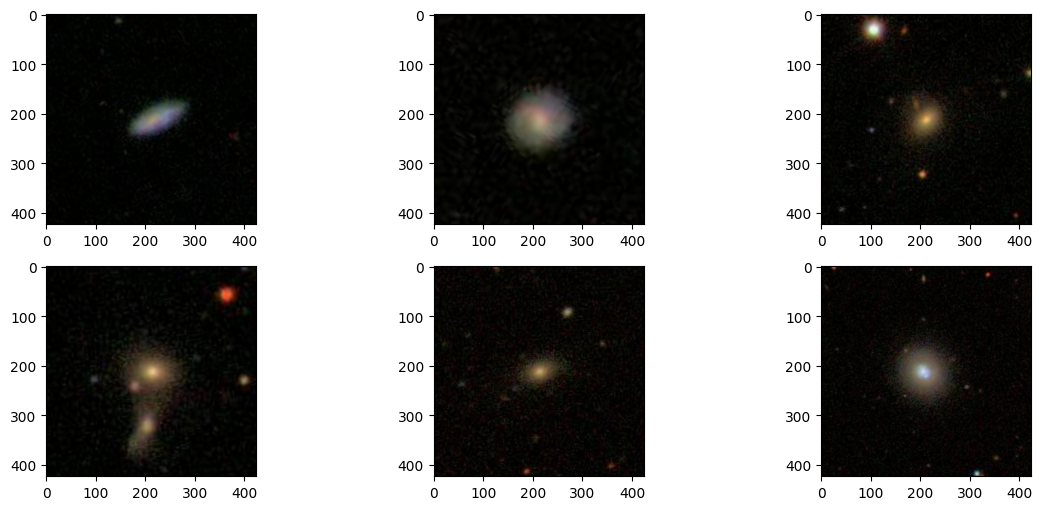

In [217]:
idx_imgs = np.random.randint(0, len(imagenes), size=6)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6), gridspec_kw={'wspace':1e-6})
axes_flat = axes.flatten()
for i, idx in enumerate(idx_imgs):
    axes_flat[i].imshow(plt.imread(os.path.join('data/GalaxyZoo/train_images/', imagenes[idx])))

In [220]:
labels = pd.read_csv('data/GalaxyZoo/train_solutions.csv')
labels.GalaxyID = labels.GalaxyID.apply(lambda idx: str(int(idx)) + '.jpg')
print(f"Hay {labels.shape[0]} imagenes para clasificar.")
print(f"Hay {labels.shape[1]-1} categorias para clasificar.")
desc = [
    'Smooth','Featured or disc','Star or artifact','Edge on','Not edge on','Bar through center','No bar',
    'Spiral','No Spiral','No bulge','Just noticeable bulge','Obvious bulge','Dominant bulge','Odd Feature','No Odd Feature',
    'Completely round','In between','Cigar shaped','Ring (Oddity)','Lens or arc (Oddity)','Disturbed (Oddity)',
    'Irregular (Oddity)','Other (Oddity)','Merger (Oddity)','Dust lane (Oddity)','Rounded bulge','Boxy bulge',
    'No bulge','Tightly wound arms','Medium wound arms','Loose wound arms','1 Spiral Arm','2 Spiral Arms',
    '3 Spiral Arms','4 Spiral Arms','More than four Spiral Arms',"Can't tell"
]

Hay 61578 imagenes para clasificar.
Hay 37 categorias para clasificar.


Para que el ejercicio practico sea manejable en términos de tiempo de entrenamiento y recursos computacionales, vamos a trabajar con un subconjunto del conjunto de datos original. Seleccionamos aleatoriamente $3.000$ imágenes de galaxias para entrenar y evaluar nuestro modelo.

In [221]:
randlabels = np.random.choice(labels.GalaxyID, size=3000, replace=False)
labels = labels[labels.GalaxyID.isin(randlabels)].reset_index(drop=True)

print(f'Nuevo conjunto de datos con {labels.shape[0]} imágenes.')

Nuevo conjunto de datos con 3000 imágenes.


In [222]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(
    labels.GalaxyID,
    labels[labels.columns[1:]],
    test_size=0.2,
    random_state=42,
)

print("Tamaño del conjunto de entrenamiento: %d" % X_train.shape[0])
print("Tamaño del conjunto de prueba: %d" % X_test.shape[0])

Tamaño del conjunto de entrenamiento: 2400
Tamaño del conjunto de prueba: 600


Las imagenes que normalmente tenemos es la composición de varias imágenes tomadas en diferentes longitudes de onda (colores) del espectro electromagnético. En una primera aproximación, puede pensarse como imágenes Red-Green-Blue normales, donde cada canal de color representa una banda específica del espectro.

No siempre es necesario usar las tres bandas para entrenar un modelo de deep learning. A veces, usar solo una o dos bandas puede ser suficiente para lograr buenos resultados, dependiendo del problema específico y la naturaleza de los datos.

Generamos entonces una transformación personalizada para cargar y preprocesar las imágenes de galaxias. Esta transformación incluye redimensionar las imágenes a un tamaño uniforme, convertirlas a tensores, normalizarlas y usar solo un canal de color (en este caso, el canal rojo) para simplificar el modelo.

In [223]:
data_transform = transforms.Compose([
    # Convertir la imagen a un tensor
    transforms.ToTensor(),  
    # Cambiar el tamaño de las imágenes a 64x64 píxeles
    transforms.Resize(size = (64, 64)),  
    # Escala de grises
    transforms.Grayscale(num_output_channels=1),
    # Normalización min-max
    transforms.Lambda(lambda x: (x - x.min()) / (x.max() - x.min()))
])

In [ ]:
class GalaxyDataset(Dataset):
    def __init__(self, image_ids, labels, img_dir, transform=None):
        self.image_ids = image_ids
        self.labels = labels
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.image_ids.iloc[idx])
        image = plt.imread(img_name)
        label = torch.tensor(self.labels.iloc[idx].values, dtype=torch.float32)

        if self.transform:
            image = self.transform(image)

        return image, label
    
train_dataset_transform = GalaxyDataset(X_train, y_train, img_dir='data/GalaxyZoo/train_images/', transform=data_transform)
trainloader_transform   = DataLoader(train_dataset_transform, batch_size=32, shuffle=True, num_workers=4)

train_dataset = GalaxyDataset(X_train, y_train, img_dir='data/GalaxyZoo/train_images/')
trainloader   = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

Veamos como se ven estas transformaciones en acción al cargar algunas imágenes del conjunto de datos y aplicar las transformaciones definidas.

Tamaño de la imagen original: (424, 424, 3)
Tamaño de la imagen transformada: torch.Size([64, 64, 1])


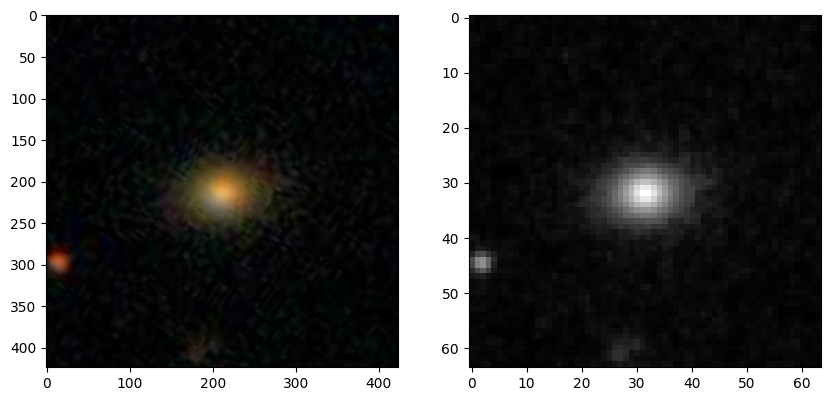

In [225]:
image , label = train_dataset[0]
print(f'Tamaño de la imagen original: {image.shape}')

image_transformed , label_transformed = train_dataset_transform[0]
print(f'Tamaño de la imagen transformada: {image_transformed.permute(2,1,0).shape}')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[1].imshow(image_transformed.permute(1, 2, 0), cmap='gray')

plt.show()

Los colores son valores absolutos que van de 0 a 255, donde 0 representa la ausencia de luz (negro) y 255 representa la máxima intensidad de luz (blanco). Al normalizar los valores de los píxeles, estamos escalando estos valores a un rango entre 0 y 1. Esto es importante para los modelos de deep learning, ya que ayuda a mejorar la convergencia durante el entrenamiento y evita problemas numéricos.

In [226]:
print(f'Los valores de los píxeles en la imagen original van de {image.min()} a {image.max()}')
print(f'Los valores de los píxeles en la imagen transformada van de {image_transformed.min()} a {image_transformed.max()}') 

Los valores de los píxeles en la imagen original van de 0 a 231
Los valores de los píxeles en la imagen transformada van de 0.0 a 1.0


Ahora si cargamos los `Dataset` y `DataLoader` correspondiente a los datos de entrenamiento y prueba.

In [244]:
BATHCH_SIZE = 128

traindataset = GalaxyDataset(X_train, y_train, img_dir='data/GalaxyZoo/train_images/', transform=data_transform)
testdataset  = GalaxyDataset(X_test, y_test, img_dir='data/GalaxyZoo/train_images/', transform=data_transform)

trainloader = DataLoader(traindataset, batch_size=BATHCH_SIZE, shuffle=True, num_workers=4)
testloader  = DataLoader(testdataset, batch_size=BATHCH_SIZE, shuffle=False, num_workers=4)

testnotransformdataset  = GalaxyDataset(X_test, y_test, img_dir='data/GalaxyZoo/train_images/')
testnotransformloader  = DataLoader(testnotransformdataset, batch_size=BATHCH_SIZE, shuffle=False, num_workers=4)

Utilizaremos el modelo de `TinyVGG`. Este modelo fue desarrollado por la Universidad de Oxford en 2014 para el tratamiento de imagenes.

In [228]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        
        """
        Aca se genera el modelo de deep learning usando solo Convolutional Neural Networks (CNN).
        Es algo sencillo.
        """
        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units * 16 * 16, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape),
            nn.Sigmoid()
        )
        

    def forward(self, x):
        
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
    
        return x
torch.manual_seed(42)
model = TinyVGG(input_shape=1, hidden_units=16, output_shape=10)
model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=16, bias=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=10, bias=True)
    (4): Sigmoid()
  )
)

In [255]:
NUM_EPOCHS = 5
NUM_CLASES = y_train.shape[1]

model = TinyVGG(
    input_shape=1,
    hidden_units=16,
    output_shape=NUM_CLASES
)

loss_fn   = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

trainloss_list, testloss_list = [], []
model.train()
for epoch in range(NUM_EPOCHS):
    train_loss, test_loss = 0.0, 0.0
    
    for images, labels in tqdm.tqdm(trainloader):
       
        y_pred = model(images)
        loss   = loss_fn(y_pred, labels)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_lossmse = train_loss / len(trainloader)
    trainloss_list.append(train_lossmse)
    
    model.eval()
    with torch.inference_mode():
        for images, labels in testloader:
            y_pred = model(images)
            loss   = loss_fn(y_pred, labels)
            test_loss += loss.item()
    
    test_lossmse = test_loss / len(testloader)
    testloss_list.append(test_lossmse)
    
    print(f'Epoch {epoch+1}/{NUM_EPOCHS}, Train Loss: {train_lossmse:.4f}, Test Loss: {test_lossmse:.4f}')

100%|██████████| 19/19 [00:10<00:00,  1.73it/s]


Epoch 1/5, Train Loss: 0.1155, Test Loss: 0.0736


100%|██████████| 19/19 [00:10<00:00,  1.83it/s]


Epoch 2/5, Train Loss: 0.0583, Test Loss: 0.0429


100%|██████████| 19/19 [00:10<00:00,  1.79it/s]


Epoch 3/5, Train Loss: 0.0355, Test Loss: 0.0316


100%|██████████| 19/19 [00:10<00:00,  1.83it/s]


Epoch 4/5, Train Loss: 0.0305, Test Loss: 0.0293


100%|██████████| 19/19 [00:11<00:00,  1.71it/s]


Epoch 5/5, Train Loss: 0.0286, Test Loss: 0.0283


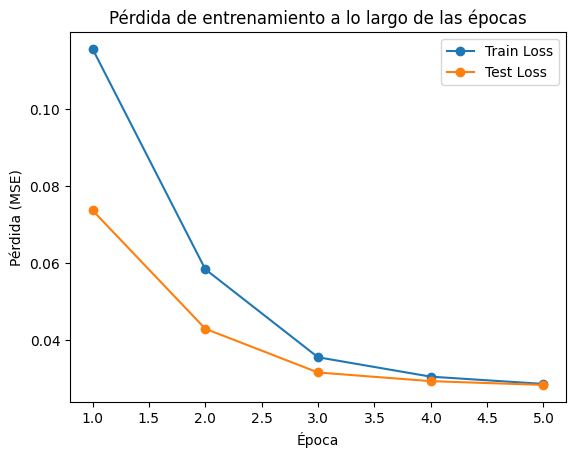

In [257]:
plt.plot(range(1, NUM_EPOCHS + 1), trainloss_list, marker='o', label='Train Loss')
plt.plot(range(1, NUM_EPOCHS + 1), testloss_list, marker='o', label='Test Loss')
plt.title('Pérdida de entrenamiento a lo largo de las épocas')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()

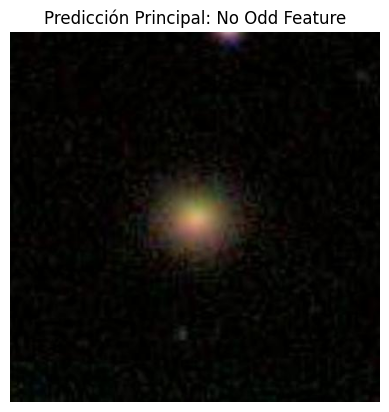

In [258]:
model.eval()
with torch.inference_mode():
    
    # 1. Obtén los lotes de AMBOS loaders al mismo tiempo
    # 'zip' los empareja: Lote 0 con Lote 0, Lote 1 con Lote 1, etc.
    (images_transformed, labels), (images_untransformed, _) = next(iter(zip(testloader, testnotransformloader)))
    
    # 2. Haz la predicción con las imágenes TRANSFORMADAS
    y_pred = model(images_transformed)
    
    # 3. Elige el índice para mostrar (ej. el primero)
    idx_to_show = np.random.randint(0, images_transformed.shape[0]-1)
    
    # --- Obtén predicciones y etiquetas para esa imagen ---
    pred_vector = y_pred[idx_to_show]
    top3_preds = torch.topk(pred_vector, k=3)
    
    true_vectors = labels[idx_to_show]
    top3_true = torch.topk(true_vectors, k=3)

# --- Gráfico ---
# 4. Selecciona la imagen NO TRANSFORMADA del índice correspondiente
image_to_plot = images_untransformed[idx_to_show] 

# plt.imread (usado en tu Dataset) carga como [H, W, C], 
# así que imshow funciona directamente. No se necesita .permute()
plt.imshow(image_to_plot) 
plt.title(f"Predicción Principal: {desc[top3_preds.indices[0].item()]}")
plt.axis('off')
plt.show()

In [259]:
# --- Impresión de Resultados (tu código ya es correcto) ---
print("--- ETIQUETA REAL (Votos) ---")
for i in range(3):
    prob = top3_true.values[i].item()
    idx = top3_true.indices[i].item()
    print(f"{i+1}. {desc[idx]}: {prob*100:.1f}%")

--- ETIQUETA REAL (Votos) ---
1. No Odd Feature: 100.0%
2. Smooth: 96.7%
3. Completely round: 82.5%


In [260]:

print("\n--- PREDICCIÓN DEL MODELO ---")
for i in range(3):
    prob = top3_preds.values[i].item()
    idx = top3_preds.indices[i].item()
    print(f"{i+1}. {desc[idx]}: {prob*100:.1f}%")


--- PREDICCIÓN DEL MODELO ---
1. No Odd Feature: 78.4%
2. Featured or disc: 57.9%
3. Smooth: 43.7%
